In [2]:
from google.colab import files
uploaded = files.upload()



Saving netflix_titles.csv to netflix_titles.csv


Saving netflix_titles.csv to netflix_titles (1).csv
✅ Data Loaded
Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8709 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)

/tmp/ipython-input-627235065.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


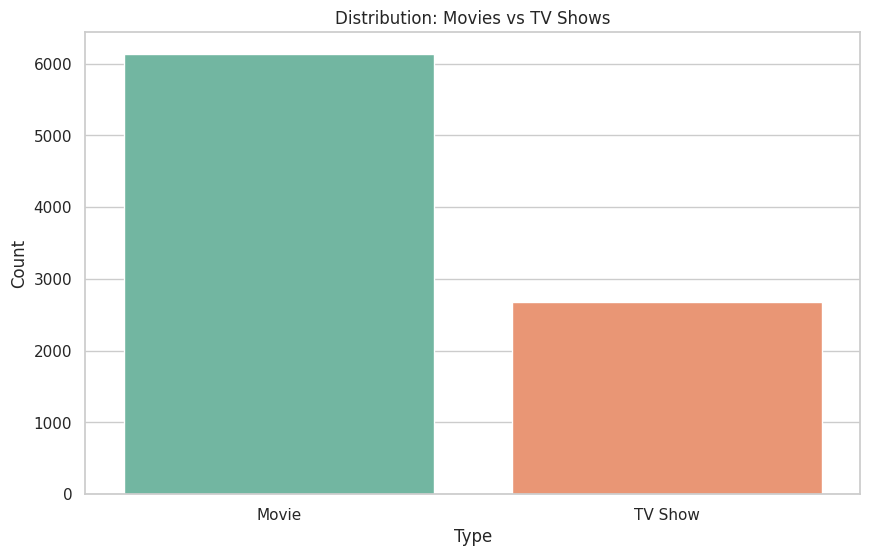

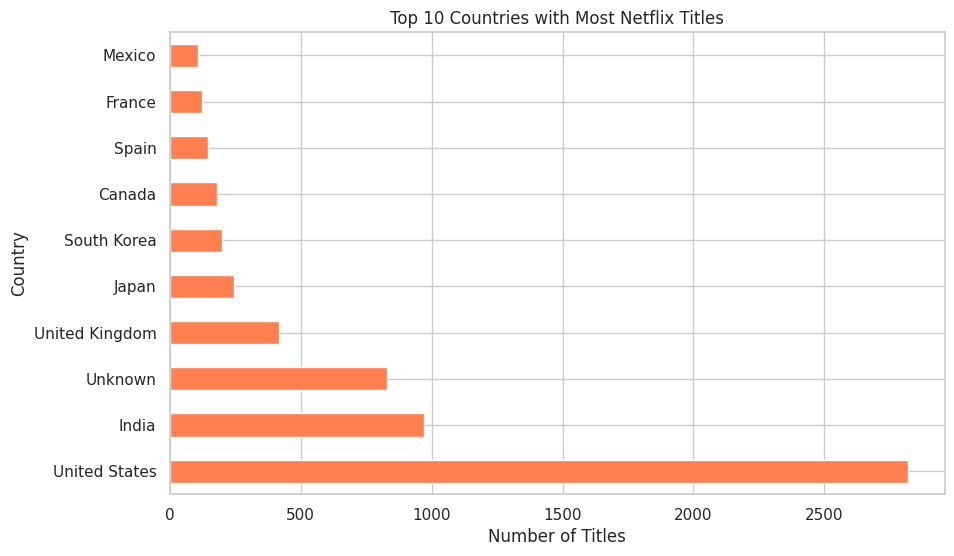

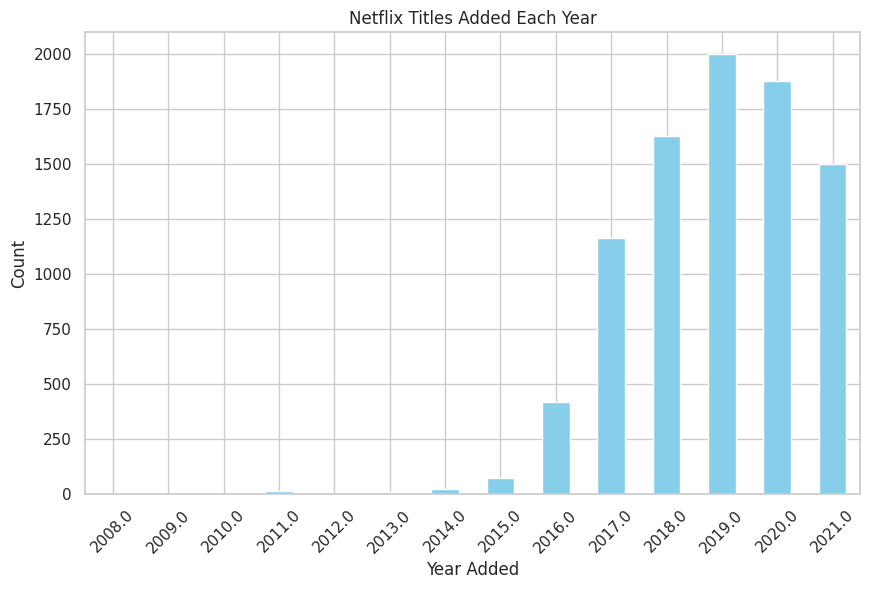

/tmp/ipython-input-627235065.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')


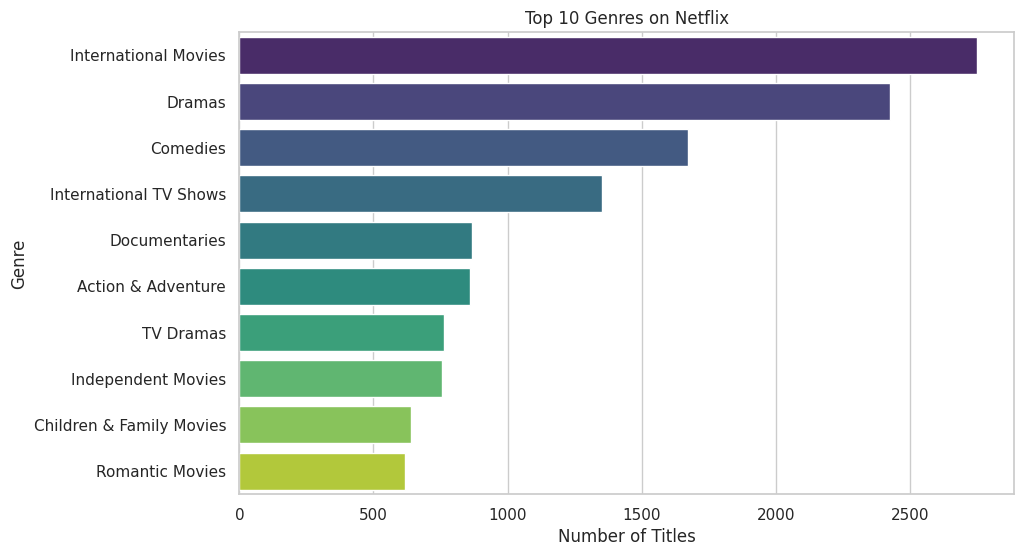

/tmp/ipython-input-627235065.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='magma')


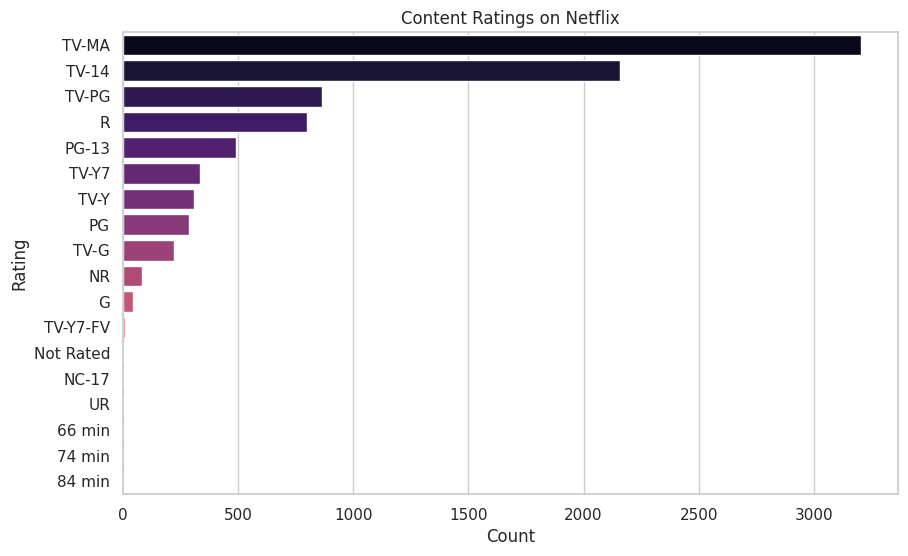

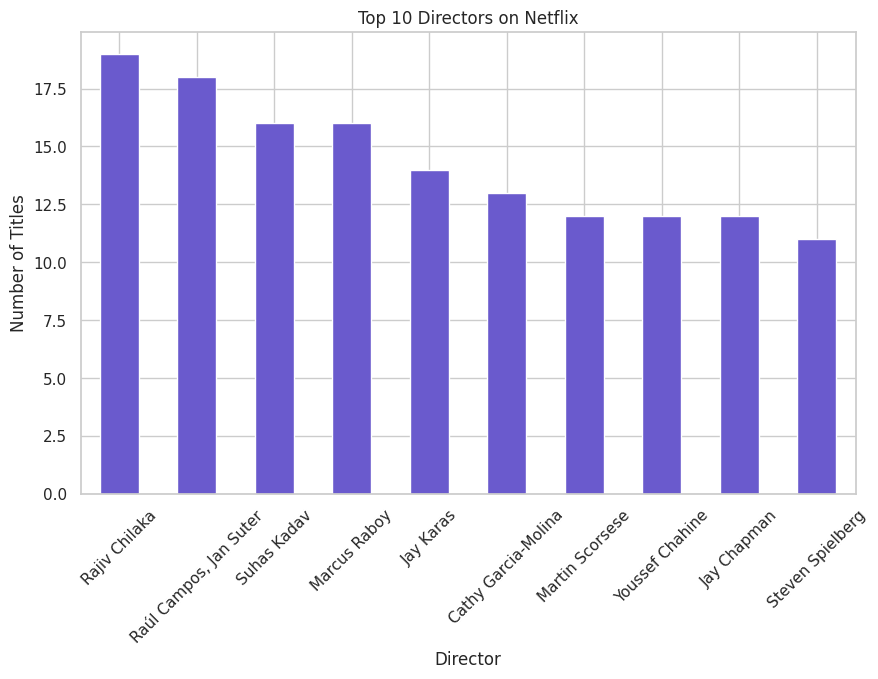

✅ Netflix EDA completed successfully!


In [4]:
# 📌 Netflix Data Analysis by Muskan Dhaka

# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Setup for plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
# STEP 2: Upload the CSV file from your computer
from google.colab import files
uploaded = files.upload()

# STEP 3: Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Preview
print("✅ Data Loaded")
print("Shape:", df.shape)
df.head()
# STEP 4: Clean and prepare data

# Fill missing values
df = df.fillna({
    'country': 'Unknown',
    'cast': 'Unknown',
    'director': 'Unknown',
    'rating': 'Not Rated'
})

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

df.info()
# STEP 5: Movies vs TV Shows
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution: Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
# STEP 6: Top 10 countries with most titles
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='barh', color='coral')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()
# STEP 7: Titles added by year
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Netflix Titles Added Each Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# STEP 8: Most common genres
genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [g.strip() for sublist in genres for g in sublist]
genre_counts = Counter(flat_genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()
# STEP 9: Rating distribution
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='magma')
plt.title('Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()
# STEP 10: Top 10 directors
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

top_directors.plot(kind='bar', color='slateblue')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()
# STEP 11: Done!
print("✅ Netflix EDA completed successfully!")
